<h1><p style="text-align:center;">Red Wine Quality </p></h1>

Sobre o conjunto de dados
Contexto
Os dois conjuntos de dados estão relacionados com variantes tinto e branco do vinho português “Vinho Verde”. Para mais detalhes consulte a referência [Cortez et al., 2009]. Devido a questões de privacidade e logística, apenas estão disponíveis variáveis ​​físico-químicas (entradas) e sensoriais (saída) (por exemplo, não existem dados sobre tipos de uva, marca do vinho, preço de venda do vinho, etc.).

#### importando as bibliotecas

In [1]:
import pandas as pd

#### Construindo e lendo o caminho para o arquivo CSV

In [3]:
#camiho dos dados
caminho_arquivo = r'dados\winequality-red.csv'
# Carregar o arquivo CSV em um dataframe pandas
dataframe = pd.read_csv(caminho_arquivo)

#### Tratamento e descrição dos dados

In [6]:
dataframe = pd.read_csv(caminho_arquivo, sep=';')  # Carregar o arquivo CSV em um dataframe pandas com ponto e vírgula como separador
dataframe.columns = dataframe.columns.str.strip()  # Remove espaços em branco no início e no final dos nomes das colunas
dataframe.columns = dataframe.columns.str.lower()  # Converte os nomes das colunas para minúsculas

In [7]:
# Exibir o cabeçalho do dataframe (os nomes das colunas)
print(dataframe.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [8]:
# primeiras linhas do DataFrame
print(dataframe.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [9]:
# Informações sobre o datafram
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [10]:
# Estatísticas descritivas para colunas numéricas
print(dataframe.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [11]:
# Verificar dados faltantes
print(dataframe.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [12]:
# Exibir os valores únicos na coluna 'quality'
print(dataframe['quality'].unique())

[5 6 7 4 8 3]


In [13]:
# Printar a média de cada coluna
media_por_coluna = dataframe.mean()

print("Média de cada coluna:")
print(media_por_coluna)

Média de cada coluna:
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
ph                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


In [14]:
# Resumo Estatístico (Mínimo, Máximo e Média):
summary = pd.DataFrame({
    'max': dataframe.max(),
    'min': dataframe.min(),
    'mean': dataframe.mean()
})

In [16]:
# Renomear os índices
summary.index = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    'quality'
]
# Exibir a tabela resumo
print(summary)

                            max      min       mean
fixed acidity          15.90000  4.60000   8.319637
volatile acidity        1.58000  0.12000   0.527821
citric acid             1.00000  0.00000   0.270976
residual sugar         15.50000  0.90000   2.538806
chlorides               0.61100  0.01200   0.087467
free sulfur dioxide    72.00000  1.00000  15.874922
total sulfur dioxide  289.00000  6.00000  46.467792
density                 1.00369  0.99007   0.996747
pH                      4.01000  2.74000   3.311113
sulphates               2.00000  0.33000   0.658149
alcohol                14.90000  8.40000  10.422983
quality                 8.00000  3.00000   5.636023


In [17]:
# Calcular o IQR para cada coluna numérica
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1

In [18]:
# Definir os limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Definir os limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [19]:
# Remover outliers
sem_outliers = dataframe[~((dataframe < limite_inferior) | (dataframe > limite_superior)).any(axis=1)]

# Exibir o novo shape do dataframe após a remoção de outliers
print("Shape do dataframe original:", dataframe.shape)
print("Shape do dataframe sem outliers:", sem_outliers.shape)

Shape do dataframe original: (1599, 12)
Shape do dataframe sem outliers: (1179, 12)


In [20]:
# Identificar outliers
outliers = ((dataframe < limite_inferior) | (dataframe > limite_superior))

# Adicionar uma coluna indicando se cada entrada é um outlier ou não
dataframe['outlier'] = outliers.any(axis=1)

In [21]:
# Filtrar linhas que contêm outliers e salvá-las em um arquivo CSV
outliers_table = dataframe[dataframe['outlier']]
outliers_table.to_csv('dados\outliers.csv', index=False)

# Filtrar linhas que não contêm outliers e salvá-las em um arquivo CSV
sem_outliers_table = dataframe[~dataframe['outlier']]
sem_outliers_table.to_csv('dados\sem_outliers.csv', index=False)


O parâmetro que representa a acidez no gosto de um vinho é a 'volatile acidity' (acidez volátil).
A 'volatile acidity' se refere à quantidade de ácido acético no vinho, que pode contribuir para uma sensação de acidez ou "azedume" na degustação.


In [22]:
# importando bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Calculando o histograma

In [32]:
# Selecionar as colunas 'volatile acidity' e 'type' para o histograma
acidez = sem_outliers_table['volatile acidity']

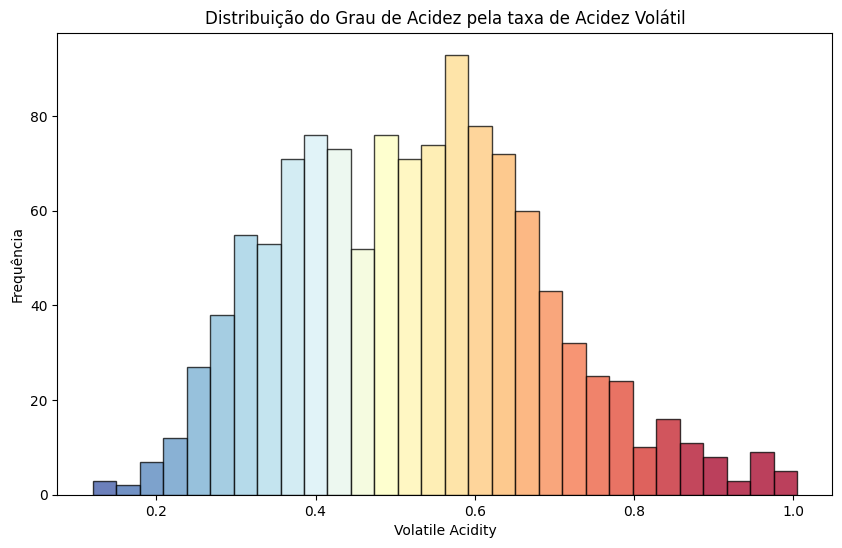

In [46]:
# Calculando o histograma
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(acidez, bins=30, edgecolor='black', alpha=0.75)

# Mapeando os valores de acidez para o colormap
valor_minimo = min(acidez)
valor_maximo = max(acidez)

# Função para mapear valores de acidez para cores
def mapa_cores(valor):
    proporcao = (valor - valor_minimo) / (valor_maximo - valor_minimo)
    return 1 - proporcao  # Invertendo a proporção para obter o efeito desejado

# Adicionando um gradiente de cores com base nos valores de acidez
for i, p in enumerate(plt.gca().patches):
    valor_acidez = (p.get_x() + p.get_width()) / 0.9  # Calculando o valor de acidez para o retângulo
    cor = plt.cm.RdYlBu(mapa_cores(valor_acidez))
    plt.setp(p, 'facecolor', cor)

# Configurações do gráfico
plt.title('Distribuição do Grau de Acidez pela taxa de Acidez Volátil', color='black')
plt.xlabel('Volatile Acidity', color='black')
plt.ylabel('Frequência', color='black')
plt.grid(True, color='none', zorder=0)  # Define a grade atrás do histograma
plt.gca().set_facecolor('white')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()


#### Gráfico para Sulphates

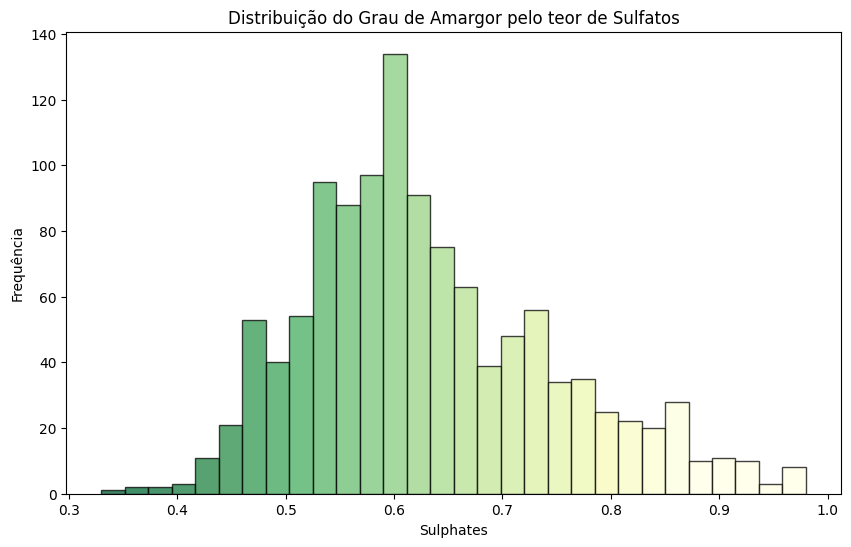

In [49]:
# Dados
sulphates = sem_outliers_table['sulphates']
chlorides = sem_outliers_table['chlorides']

# Configurações do gráfico para Sulphates
plt.figure(figsize=(10, 6))

# Calculando o histograma para Sulphates
n_sulphates, bins_sulphates, _ = plt.hist(sulphates, bins=30, edgecolor='black', alpha=0.75)

# Mapeando os valores de sulphates para o colormap
valor_minimo_sulphates = min(sulphates)
valor_maximo_sulphates = max(sulphates)

# Função para mapear valores de sulphates para cores
def mapa_cores_sulphates(valor):
    proporcao = (valor - valor_minimo_sulphates) / (valor_maximo_sulphates - valor_minimo_sulphates)
    return 1 - proporcao  # Invertendo a proporção para obter o efeito desejado

# Adicionando um gradiente de cores com base nos valores de sulphates
for i, p in enumerate(plt.gca().patches):
    valor_sulphates = (p.get_x() + p.get_width()) / 0.9  # Calculando o valor de sulphates para o retângulo
    cor_sulphates = plt.cm.YlGn(mapa_cores_sulphates(valor_sulphates))
    plt.setp(p, 'facecolor', cor_sulphates)

# Configurações do gráfico para Sulphates
plt.title('Distribuição do Grau de Amargor pelo teor de Sulfatos', color='black')
plt.xlabel('Sulphates', color='black')
plt.ylabel('Frequência', color='black')
plt.grid(True, color='none', zorder=0)  # Define a grade atrás do histograma
plt.gca().set_facecolor('white')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.xticks(color='black')
plt.yticks(color='black')

# Exibição do gráfico Sulphates
plt.show()

#### Gráfico Chlorides

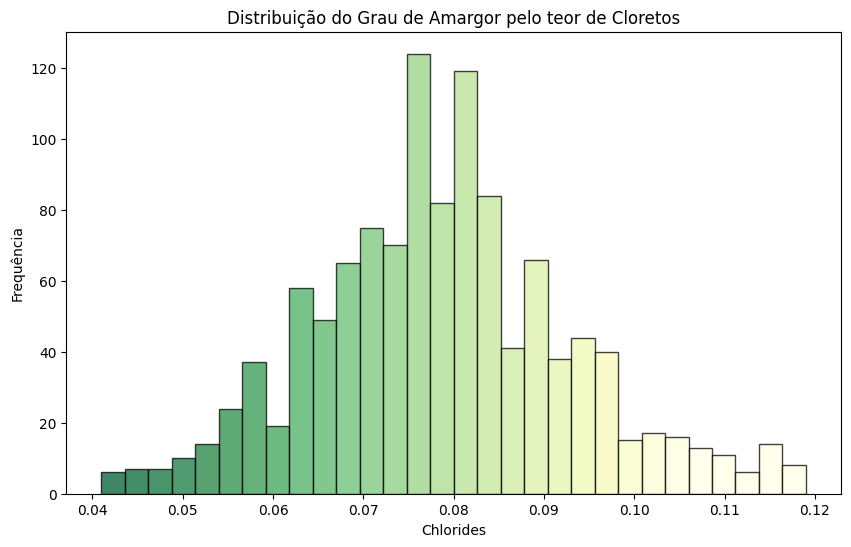

In [51]:
# Configurações do gráfico para Chlorides
plt.figure(figsize=(10, 6))

# Calculando o histograma para Chlorides
n_chlorides, bins_chlorides, _ = plt.hist(chlorides, bins=30, edgecolor='black', alpha=0.75)

# Mapeando os valores de chlorides para o colormap
valor_minimo_chlorides = min(chlorides)
valor_maximo_chlorides = max(chlorides)

# Função para mapear valores de chlorides para cores
def mapa_cores_chlorides(valor):
    proporcao = (valor - valor_minimo_chlorides) / (valor_maximo_chlorides - valor_minimo_chlorides)
    return 1 - proporcao  # Invertendo a proporção para obter o efeito desejado

# Adicionando um gradiente de cores com base nos valores de chlorides
for i, p in enumerate(plt.gca().patches):
    valor_chlorides = (p.get_x() + p.get_width()) / 0.9  # Calculando o valor de chlorides para o retângulo
    cor_chlorides = plt.cm.YlGn(mapa_cores_chlorides(valor_chlorides))
    plt.setp(p, 'facecolor', cor_chlorides)

# Configurações do gráfico para Chlorides
plt.title('Distribuição do Grau de Amargor pelo teor de Cloretos', color='black')
plt.xlabel('Chlorides', color='black')
plt.ylabel('Frequência', color='black')
plt.grid(True, color='none', zorder=0)  # Define a grade atrás do histograma
plt.gca().set_facecolor('white')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.xticks(color='black')
plt.yticks(color='black')

# Exibição do gráfico Chlorides
plt.show()